In [1]:
!pip install pandas scikit-learn matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [5]:

from google.colab import files
uploaded = files.upload()


Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [ ]:
df = pd.read_csv('BankNote_Authentication.csv')


print("First 5 rows of the dataset:")
print(df.head())

print("\nColumn names:")
print(df.columns)

df.columns = df.columns.str.strip()


First 5 rows of the dataset:
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

Column names:
Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')


In [ ]:

X = df.drop('class', axis=1) 
y = df['class']  
print(f"Total Samples: {len(df)} | Features per Sample: {X.shape[1]}")



Total Samples: 1372 | Features per Sample: 4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

🔎 Accuracy: 0.9927272727272727

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



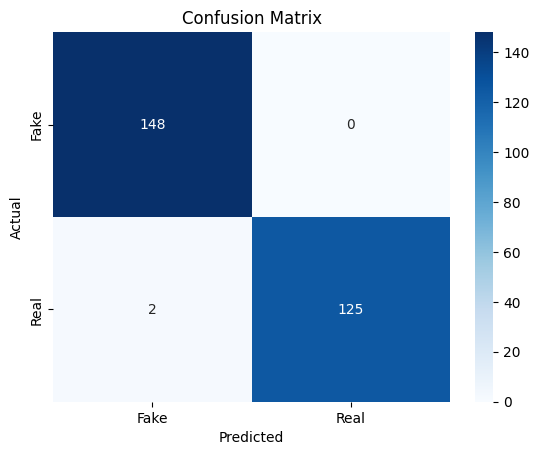

In [ ]:
y_pred = clf.predict(X_test)

print("🔎 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
sample = X_test.iloc[0].values.reshape(1, -1)
prediction = clf.predict(sample)
print("✅ Prediction on sample note:", "Real" if prediction[0] == 1 else "Fake")


✅ Prediction on sample note: Fake


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
import joblib
joblib.dump(clf, 'currency_auth_model.pkl')


['currency_auth_model.pkl']

In [21]:
model = joblib.load('currency_auth_model.pkl')


In [29]:
!pip install opencv-python-headless pandas scikit-learn matplotlib scipy



In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy.stats import kurtosis, skew



In [31]:
# Example function to calculate variance, skewness, kurtosis, and entropy
def extract_image_features(image):
    # Flatten image to 1D for feature extraction
    pixels = image.flatten()

    # Calculate the variance of pixel values
    variance = np.var(pixels)

    # Calculate the skewness of pixel values
    pixel_skewness = skew(pixels)

    # Calculate the kurtosis of pixel values
    pixel_kurtosis = kurtosis(pixels)

    # Calculate the entropy (based on pixel value distribution)
    hist, bins = np.histogram(pixels, bins=256, range=(0, 256))
    hist = hist / np.sum(hist)  # Normalize histogram
    entropy = -np.sum(hist * np.log2(hist + 1e-9))  # Avoid log(0)

    return [variance, pixel_skewness, pixel_kurtosis, entropy]


Saving India_new_500_INR,_MG_series,_2016,_obverse.jpg to India_new_500_INR,_MG_series,_2016,_obverse.jpg


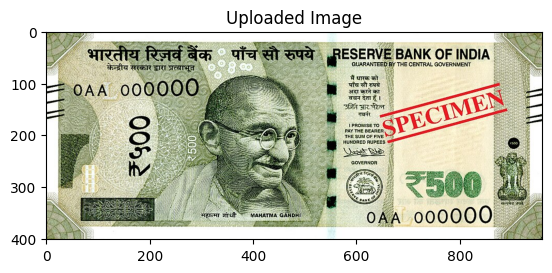

In [36]:
# Upload image for prediction
uploaded_image = files.upload()

# Load the uploaded image
img_path = list(uploaded_image.keys())[0]
image = cv2.imread(img_path)

# Convert image to grayscale (if required)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the uploaded image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Uploaded Image")
plt.show()



In [37]:
# Extract the features from the grayscale image
features = extract_image_features(gray_image)

# Display the extracted features
print("Extracted Features: ", features)

# Reshape the features to match the model's input format (one sample, four features)
features = np.array(features).reshape(1, -1)

# Load the trained model (make sure the model is loaded from a .pkl file)
import joblib
model = joblib.load('currency_auth_model.pkl')

# Predict if the currency note is real or fake
prediction = model.predict(features)

# Print the prediction
print("Prediction on the uploaded image:", "Real" if prediction[0] == 1 else "Fake")



Extracted Features:  [np.float64(4799.5692932827305), np.float64(-0.9961354799677891), np.float64(0.1893610152801286), np.float64(7.404927792900518)]
Prediction on the uploaded image: Fake


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
